# Spectrum changes with single lens imaging

At first, the pupil flane in frequency domain should be reveal.

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io as sio
from skimage.transform import resize
import os
import numpy as np
import sys
import imp
sys.path.append("D:\\Workspace\\git_proj\\CCCode")
import imaging_process
imp.reload(imaging_process)
from imaging_process import ft2, ift2, Wavefront, tie_solution, img_val_norm, Check

PIXEL_SIZE = 5e-6
PIXEL_NUM = 512
WAVELENGTH = 500e-9

In [5]:
# import images
imgs_path = "D:\\Workspace\\datasets\\open_image_val_standard"
imgs_name_list = os.listdir(imgs_path)[0:2]
imgs_fpath_list = [os.path.join(imgs_path, img_name) for img_name in imgs_name_list]
amp_img = img_val_norm(resize(sio.imread(imgs_fpath_list[0]), (PIXEL_NUM, PIXEL_NUM)), 0.1, 1)
pha_img = img_val_norm(resize(sio.imread(imgs_fpath_list[1]), (PIXEL_NUM, PIXEL_NUM)), 0.2, 1.5)

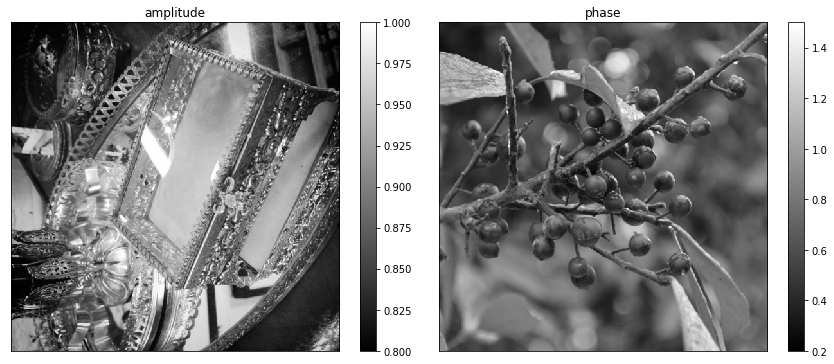

In [10]:
# plt.figure(figsize=[10, 4])
# plt.subplot(121)
# plt.imshow(amp_img, cmap="gray")
# plt.title("amplitude")
# plt.colorbar()
# plt.subplot(122)
# plt.imshow(pha_img, cmap="gray")
# plt.title("phase")
# plt.colorbar()
# plt.tight_layout()
# plt.show()
Check.multi_img(amplitude=amp_img, phase=pha_img)

In [51]:
import imaging_process
imp.reload(imaging_process)
from imaging_process import ft2, ift2, Wavefront, tie_solution, img_val_norm, Check

ff = 100e-3
d1 = 2*ff
d2 = 2*ff

img_list = []
for r_na in np.arange(0.3, 1.0, 0.02):
    del wf_obj
    wf_obj = Wavefront.from_bioimage(amp_img, pha_img, WAVELENGTH, PIXEL_SIZE)
    print(r_na)
    imaging_pl_focus = wf_obj.lens_transfer(d1=d1, focus=ff, d2=d2, relative_na=r_na).wavefront
    img_intensity = abs(imaging_pl_focus*imaging_pl_focus.conj())
    img_list.append(img_intensity)

0.3
0.32
0.34
0.36000000000000004
0.38000000000000006
0.4000000000000001
0.4200000000000001
0.4400000000000001
0.46000000000000013
0.48000000000000015
0.5000000000000002
0.5200000000000002
0.5400000000000003
0.5600000000000003
0.5800000000000003
0.6000000000000003
0.6200000000000003
0.6400000000000003
0.6600000000000004
0.6800000000000004
0.7000000000000004
0.7200000000000004
0.7400000000000004
0.7600000000000005
0.7800000000000005
0.8000000000000005
0.8200000000000005
0.8400000000000005
0.8600000000000005
0.8800000000000006
0.9000000000000006
0.9200000000000006
0.9400000000000006
0.9600000000000006
0.9800000000000006


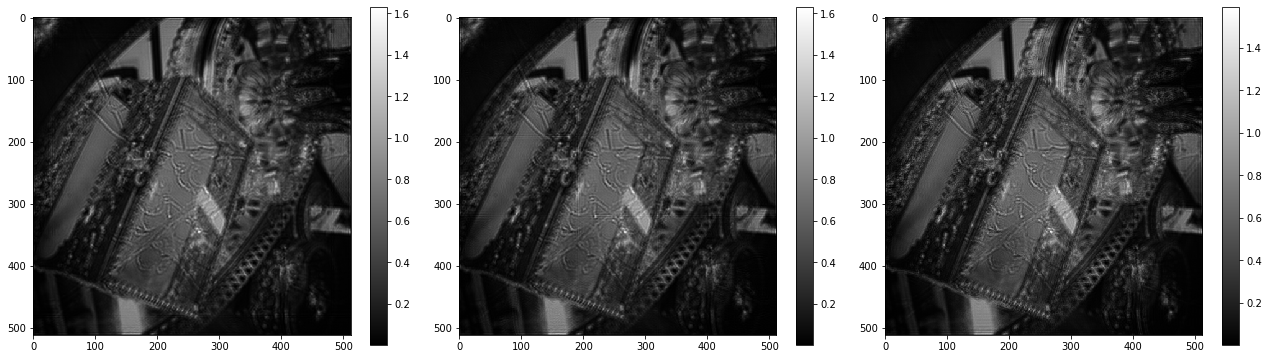

In [58]:
plt.figure(figsize=[18, 5])
plt.subplot(131)
plt.imshow(img_list[7], cmap="gray")
plt.colorbar()
plt.subplot(132)
plt.imshow(img_list[8], cmap="gray")
plt.colorbar()
plt.subplot(133)
plt.imshow(img_list[10], cmap="gray")
plt.colorbar()
plt.tight_layout()
plt.show()

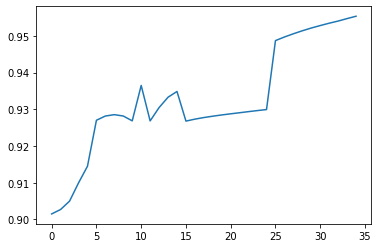

In [57]:
from cc_math import pearson_correlation_coefficient_comput, mse_compute

intensity = amp_img**2
corr = []
mse = []
for img in img_list:
    corr.append(pearson_correlation_coefficient_comput(img, np.rot90(intensity, 2)))
    mse.append(mse_compute(img, np.rot90(intensity, 2)))

plt.plot(corr)
# plt.plot(mse)
plt.show()